<a href="https://colab.research.google.com/github/saumyam2/Projects/blob/main/Synapse_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/Language Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


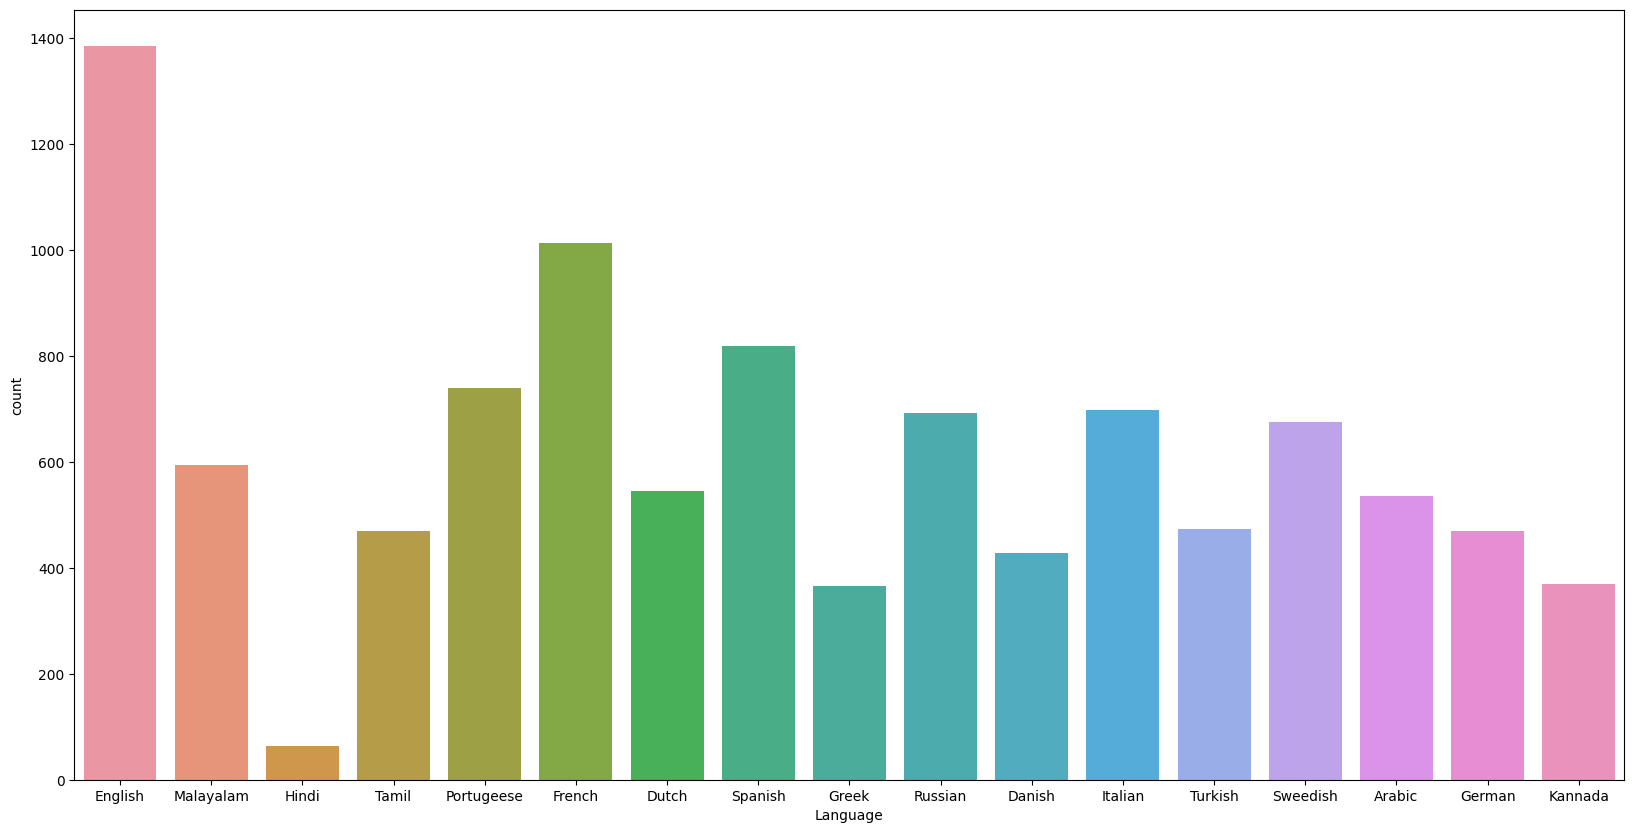

In [ ]:
plt.figure(figsize= (20,10))
sns.countplot(x='Language', data=df)
plt.show()

In [ ]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = " ".join(['hi', 'there'])
text

'hi there'

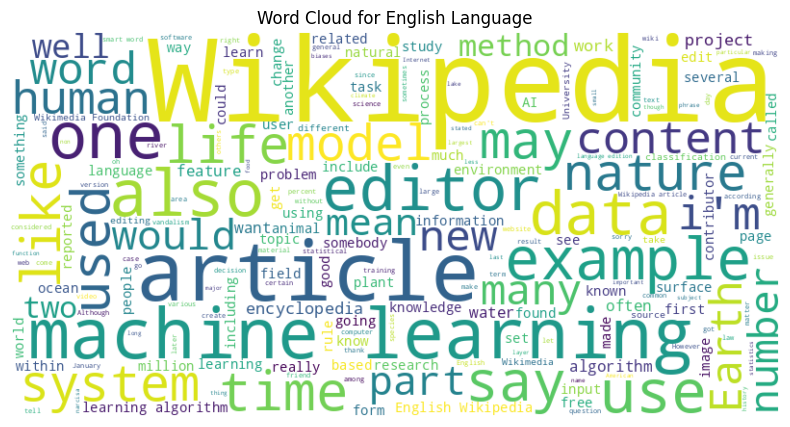

In [ ]:
text = " ".join(df[df['Language'] == 'English']['Text'])
wordcloud = WordCloud(width=800, height= 400, background_color = 'white', stopwords = set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for English Language')
plt.axis('off')
plt.show()

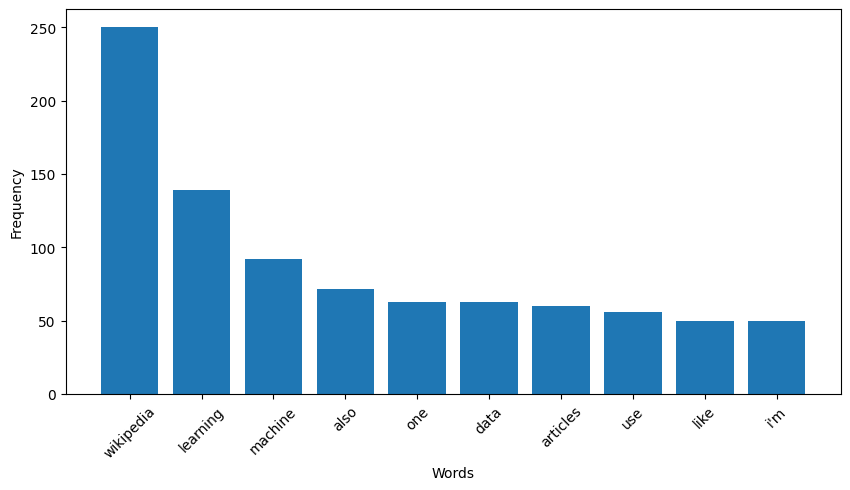

In [ ]:
text = " ".join(df[df['Language'] == 'English']['Text'])
text = text.lower()
words = text.split()
words = [word for word in words if word not in set(stopwords.words('english'))]
word_freq = nltk.FreqDist(words)
common_words = word_freq.most_common(10)

x_values, y_values = zip(*common_words)
plt.figure(figsize=(10,5))

plt.bar(x_values, y_values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
words

In [ ]:
common_words

[('wikipedia', 250),
 ('learning', 139),
 ('machine', 92),
 ('also', 72),
 ('one', 63),
 ('data', 63),
 ('articles', 60),
 ('use', 56),
 ('like', 50),
 ("i'm", 50)]

In [ ]:
x = np.array(df['Text'])
y = np.array(df['Language'])

cv = CountVectorizer(lowercase=True)
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(X.toarray()[0])
fn = cv.get_feature_names_out()
print(fn)
print(fn.shape)

[0 0 0 ... 0 0 0]
['00' '000' '000க' ... 'ൾക' 'ൾപ' 'ൾമ']
(39928,)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8660541586073501

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9840425531914894

In [ ]:
model = MultinomialNB(alpha=0.05)  #statQuest ytube
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9840425531914894

In [ ]:
user = input("Enter sentence: ")
ans = np.array([user])
enc_ans = cv.transform(ans)
output = model.predict(enc_ans)
print("The detected language is: ", output[0])

Enter sentence: jai shree ram
The detected language is:  English
